# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение данных из файла

Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
rating = pd.read_csv('/datasets/rating.csv')

Рассмотрим выборку описательной статистики и самой информации о датасетах по каждой таблице.

### Рассмотрим таблицу  games

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Рассмотрим таблицу rating

In [6]:
rating.head(10)

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [7]:
rating.describe().T

,count,unique,top,freq
rating_type,8,8,EC,1
decryption,8,8,Подросткам 13—19 лет,1


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 256.0+ bytes


# Промежуточный вывод

Была просмотрена информация о датасетах по каждой таблице и сделаны предвательные выводы.

Для достижения поставленной задачи необходимо решить вопросы по следующим пунктам:
- привести названия столбцов к нижнему регистру;
- заменить названия столбцов для удобства;
- столбец "user_score " имеет тип данных object, следует заменить на формат - float;
- по столбецам: "user_score", "critic_store", "year_of_release" произвести замену пропущенных значений.

## Предобработка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### Произведем замену названий столбцов (приведите к нижнему регистру).

Для удобства работы приведем названия столбцов к нижнему регистру.

In [9]:
games.columns = games.columns.str.lower()
rating.columns = rating.columns.str.lower()

Заменим названия столбцов.

In [10]:
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [11]:
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'jp_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
games.set_axis(cols, axis='columns', inplace=True)

Проверим произошла ли замена.

In [12]:
games.columns.tolist()

['game_name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating_type']

Замена произведена.

### Преобразуем данные в нужные типы и обработаем пропуски при необходимости.


Рассмотрим таблицу "games" столбец "user_score". Данные в этом столбец имеют формат - object. Если бы столбец содержал в себе только числа и NaN, то формат данных был бы - float. 

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы имеем: числа, NaN и tbd. Посмотрим сколько значений tbd имеется в столбце user_score.

In [14]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Данное количество составило 2424, довольно много. Необходимо данное значение исправить и изменить тип данных на числовой. 
Так как пользовательская оценка существует заменять tbd на ноль будет не правильным. Произведем замену на (-1). Не производить замену будет тоже не верным решением, количество пропусков не маленькой и в тоже время значение tbd рассматривается как NaN.

In [15]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

По таблице "games" столбец "user_score" произведем замену NaN и tbd на значение (-1).

По таблице "games" столбец "critic_store" произведем замену NaN на значение (-1).

In [16]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

Рассмотрим таблицу "games" столбец "year_of_release".

In [17]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Произведем замену отсутствующих значений на 2077. Данное число является отсылкой к Cyberpunk 2077, которая обозначает отсутсвие даты релиза. Совершать замены на иные значения, будет не совсем верным решением, так как выход игры на различных платформах может отличаться на несколько лет и больше.

In [18]:
games['year_of_release'] = games['year_of_release'].fillna(2077)
games['year_of_release'] = games['year_of_release'].astype('int')

Проверим.

In [19]:
games['year_of_release'].max()

2077

Все верно.

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating_type        9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Были исправлены 269 пропущенных значений по столбцу "year_of_release".

Были исправлены 8 578 пропущенных значений по столбцу "critic_store".

Были исправлены 6 701 пропущенных значений по столбцу "user_score".

Можем заметить, что у нас остались пропуски по столбцам: "game_name", "genre", "rating_type". Исправим, произведем замену. 

Столбец "game_name", имеет пропущенные значения, но имеет остальные показатели. Обозначим пропущенные значения "no name game" (игра без названия). Столбец "genre", имеет пропущенные значения, но имеет остальные показатели. Обозначим пропущенные значения "no genre name" (игра без жанра). Столбец "rating_type", игры могут иметь различные рейтинги на разных платформах. В связи с чем поставим всем одну общую группу "out of rating" (вне рейтинга).

In [21]:
games['game_name'] = games['game_name'].fillna('no name game')
games['genre'] = games['genre'].fillna('no genre game')
games['rating_type'] = games['rating_type'].fillna('out of rating')

# Промежуточный вывод

Была произведена замена типа данных и замена пропусков, где это было нужно, по следующим столбцам таблицы "games":

- "user_score";
- "critic_store";
- "year_of_release";
- "game_name";
- "genre";
- "rating_type".

Проверим на наличие дубликатов таблицу "games" и "rating".

In [22]:
games.duplicated().sum()

0

In [23]:
rating.duplicated().sum()

0

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

Произведем рассчет количества продаж во всех регионах. Полученные данные вынесем в отдельный столбец "total_sales".

In [24]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,out of rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,out of rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,out of rating,28.31


## Исследовательский анализ данных

- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году; сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками

### Построим график распределения по годам релиза.

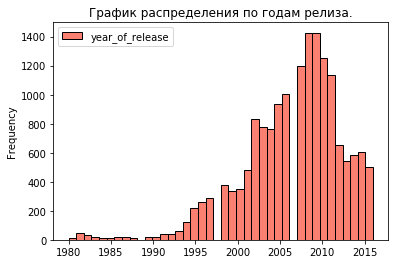

In [25]:
ax = games[games['year_of_release'] != 2077]['year_of_release'].plot(kind='hist', color='salmon', ec='black', bins=40).legend()
plt.title('График распределения по годам релиза.');

# Промежуточный вывод

До 1980 игра практически не было. Далее наблюдается рост по количеству игр, выпущенных в год. Резкий скачок произошел в 2002 году. Пик приходиться на 2008-2009 года. С 2010 года наблюдается спад, связанный с перенасыщением рынка, переход на мобильные платформы, интеграция социальный сетей в жизнь людей. Это привело к тому, что интерес к играм упал, а заинтересованность для инвесторов потеряла свою привлекательность.

### Построим график распределения по годам релиза для игр с отзывами и без отзывов. Сравним полученные распределения.

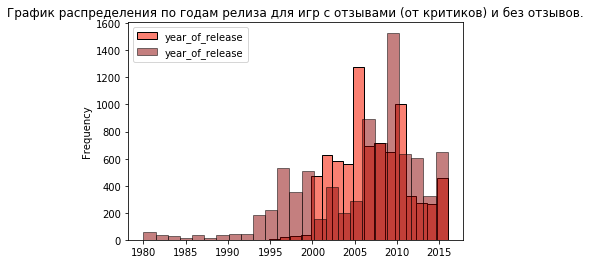

In [26]:
games[(games['year_of_release'] != 2077) & (games['critic_score'] > 0)]['year_of_release'].plot(kind='hist', color='salmon', ec='black', bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['critic_score'] == -1)]['year_of_release'].plot(kind='hist', color='darkred', ec='black', bins=25, alpha=0.5).legend()
plt.title('График распределения по годам релиза для игр с отзывами (от критиков) и без отзывов.');

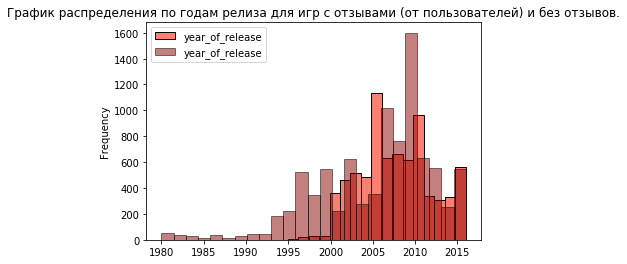

In [27]:
games[(games['year_of_release'] != 2077) & (games['user_score'] > 0)]['year_of_release'].plot(kind='hist', color='salmon', ec='black',bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['user_score'] == -1)]['year_of_release'].plot(kind='hist', color='darkred', ec='black',bins=25, alpha=0.5).legend()
plt.title('График распределения по годам релиза для игр с отзывами (от пользователей) и без отзывов.');

In [28]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()

Построим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов критиков.

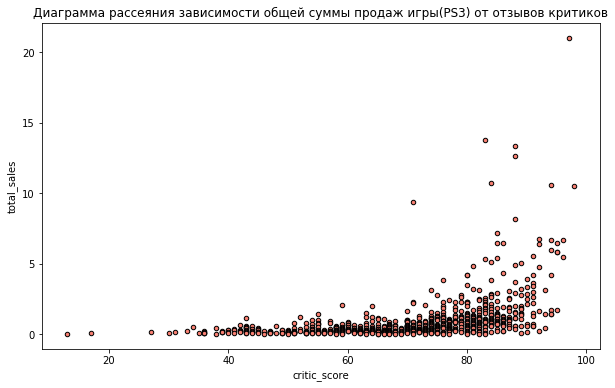

In [29]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='total_sales', color='salmon', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS3) от отзывов критиков');

Построим диаграмму рассеяния зависимости общей суммы продаж игры от отзывов пользователей.

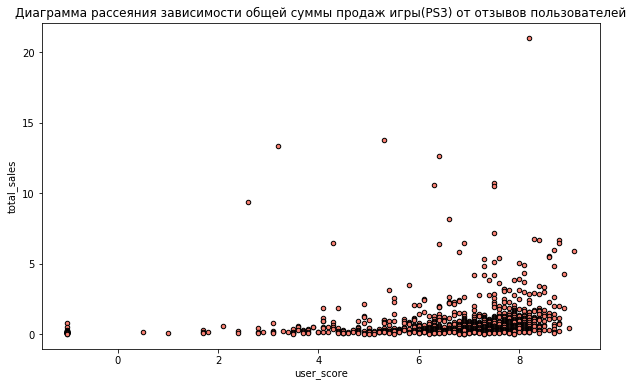

In [30]:
ames_ps3 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='total_sales', color='salmon', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS3) от отзывов пользователей');

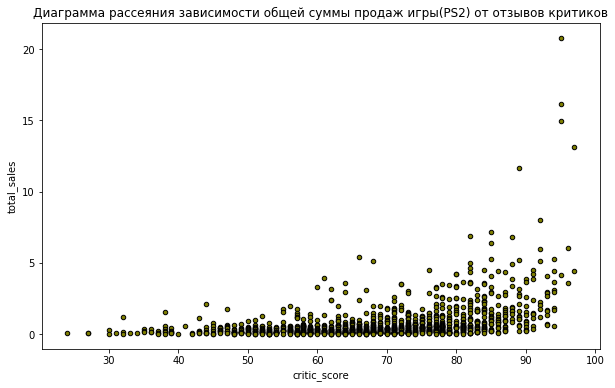

In [31]:
games_ps2 = games[(games['platform'] == 'PS2') & (games['critic_score'] > 0)].copy()
games_ps2.plot(kind='scatter', x='critic_score', y='total_sales', color='olive', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS2) от отзывов критиков');

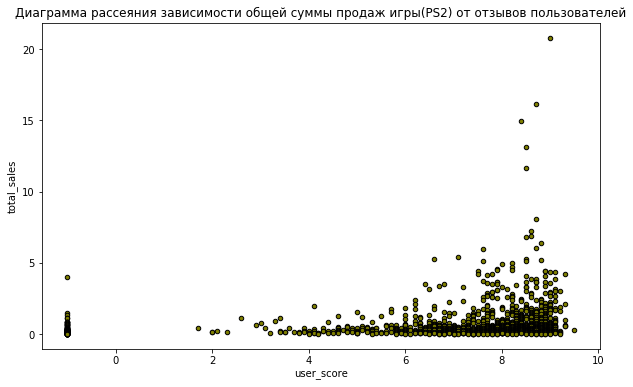

In [32]:
ames_ps2 = games[(games['platform'] == 'PS2') & (games['user_score'] > 0)].copy()
games_ps2.plot(kind='scatter', x='user_score', y='total_sales', color='olive', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS2) от отзывов пользователей');

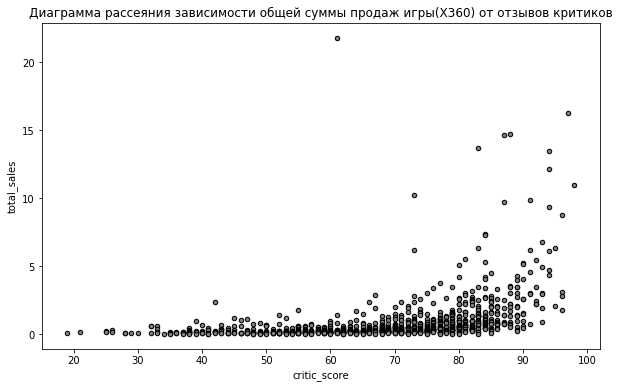

In [33]:
games_x360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()
games_x360.plot(kind='scatter', x='critic_score', y='total_sales', color='grey', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(X360) от отзывов критиков');

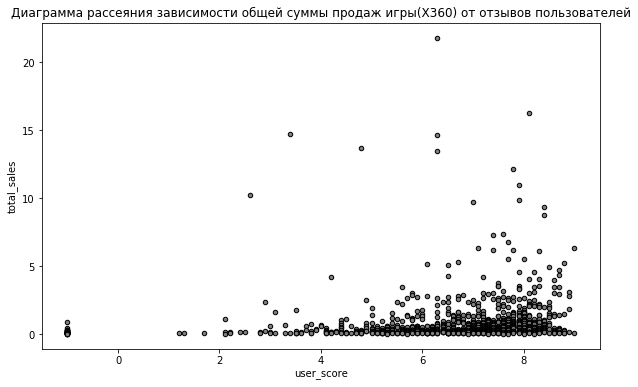

In [34]:
ames_x360 = games[(games['platform'] == 'X360') & (games['user_score'] > 0)].copy()
games_x360.plot(kind='scatter', x='user_score', y='total_sales', color='grey', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(X360) от отзывов пользователей');

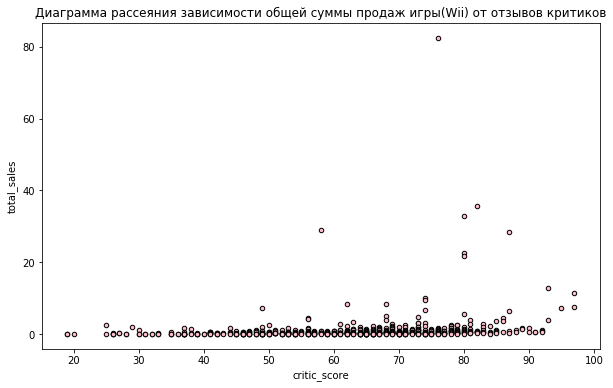

In [35]:
games_wii = games[(games['platform'] == 'Wii') & (games['critic_score'] > 0)].copy()
games_wii.plot(kind='scatter', x='critic_score', y='total_sales', color='pink', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(Wii) от отзывов критиков');

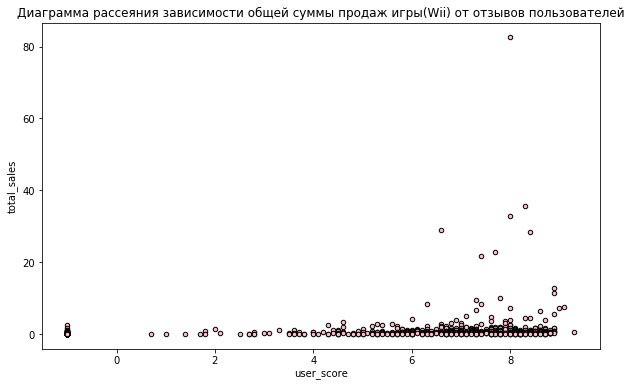

In [36]:
ames_wii = games[(games['platform'] == 'Wii') & (games['user_score'] > 0)].copy()
games_wii.plot(kind='scatter', x='user_score', y='total_sales', color='pink', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(Wii) от отзывов пользователей');

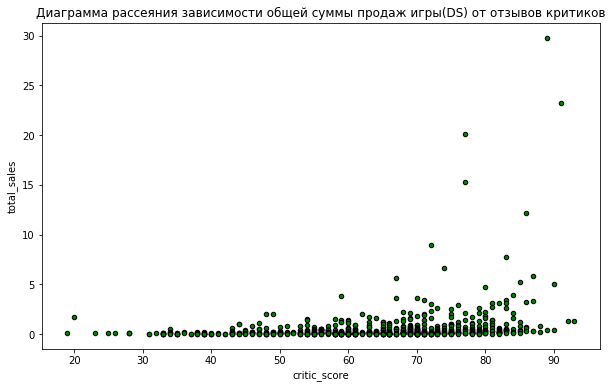

In [37]:
games_ds = games[(games['platform'] == 'DS') & (games['critic_score'] > 0)].copy()
games_ds.plot(kind='scatter', x='critic_score', y='total_sales', color='green', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(DS) от отзывов критиков');

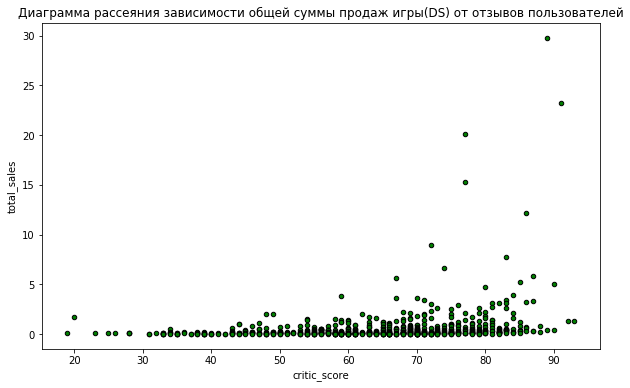

In [38]:
games_ds = games[(games['platform'] == 'DS') & (games['critic_score'] > 0)].copy()
games_ds.plot(kind='scatter', x='critic_score', y='total_sales', color='green', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(DS) от отзывов пользователей');

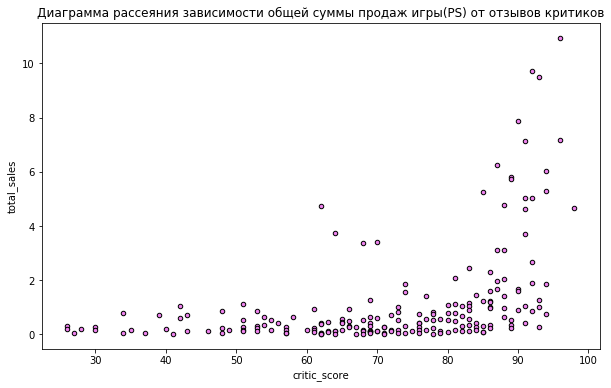

In [39]:
games_ps = games[(games['platform'] == 'PS') & (games['critic_score'] > 0)].copy()
games_ps.plot(kind='scatter', x='critic_score', y='total_sales', color='violet', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS) от отзывов критиков');

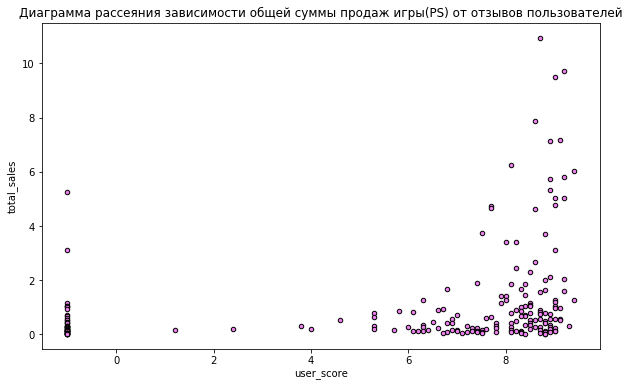

In [40]:
ames_ps = games[(games['platform'] == 'PS') & (games['user_score'] > 0)].copy()
games_ps.plot(kind='scatter', x='user_score', y='total_sales', color='violet', ec='black', figsize=(10,6))
plt.title('Диаграмма рассеяния зависимости общей суммы продаж игры(PS) от отзывов пользователей');

# Промежуточный вывод

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Похожая картина наблюдается и с отзовами от пользователей, правда так называемых выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги.

### Построим график продаж по каждому году.

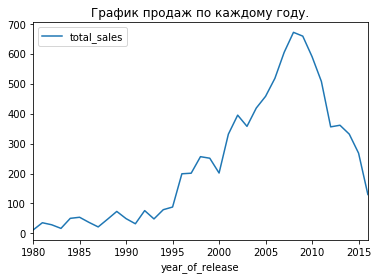

In [41]:
games[games['year_of_release'] != 2077].groupby('year_of_release').agg({'total_sales':'sum'}).plot()
plt.title('График продаж по каждому году.');

# Промежуточный вывод

С 2009 - 2010 года наблюдается резкий и стабильный спад игрового рынка.

Импортируем нашу новую библиотеку.

In [42]:
!pip install mplcursors

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import mplcursors

In [44]:
def create_any_lines(platforms=None, query=None):
    %matplotlib notebook
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('platform == @platform')
        else:
            df_to_plot = games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(10,5))
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

<IPython.core.display.Javascript object>


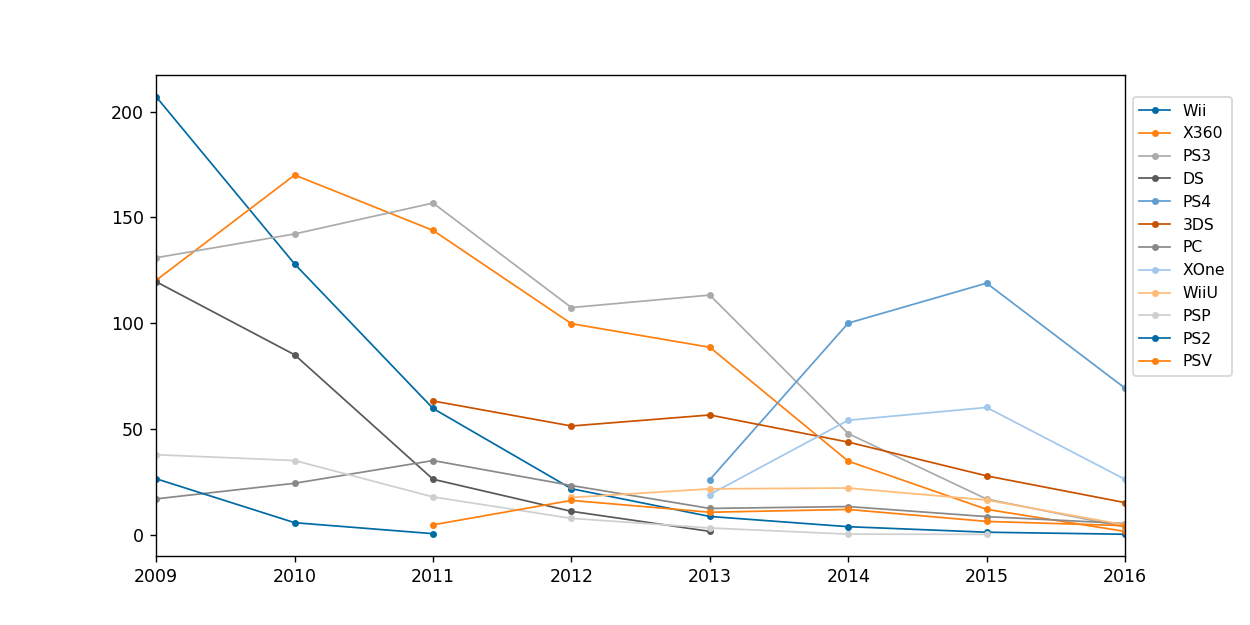

In [45]:
create_any_lines(query='2009 <= year_of_release <= 2016')

# Промежуточный вывод

Был выделен актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить прогноз на 2017 год. На мой взгляд, актуальным периодом является период с 2009 по 2016 год, предыдущие года использовать не будем. Был построен график, отображающий динамику продаж по уже актуальным годам. На конец 2016 года лидируют по продажам следующие платформы:

- PS4;
- Xone;
- 3DS.

Выделили топ-3 игровых платформ. Однако следует отметить, что исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь игровой рынок приходит в упадок.

### Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период.

Напишем функцию.

In [46]:
games.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(15).T

platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC,3DS,XB,GB,NES,N64
total_sales,1255.77,971.42,939.65,907.51,806.12,730.86,317.85,314.14,294.05,259.52,259.0,257.74,255.46,251.05,218.68


Безусловным лидером является платформа PS2. Далее идут Xbox360, PS3 и Wii.
Самые редкие платформы - представители японских технологий.

Выделим топ-6 игровых платформ.

In [47]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

### Построим ящик с усами по глобальным продажам.

Напишем функцию.

In [48]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games.boxplot(column='total_sales', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

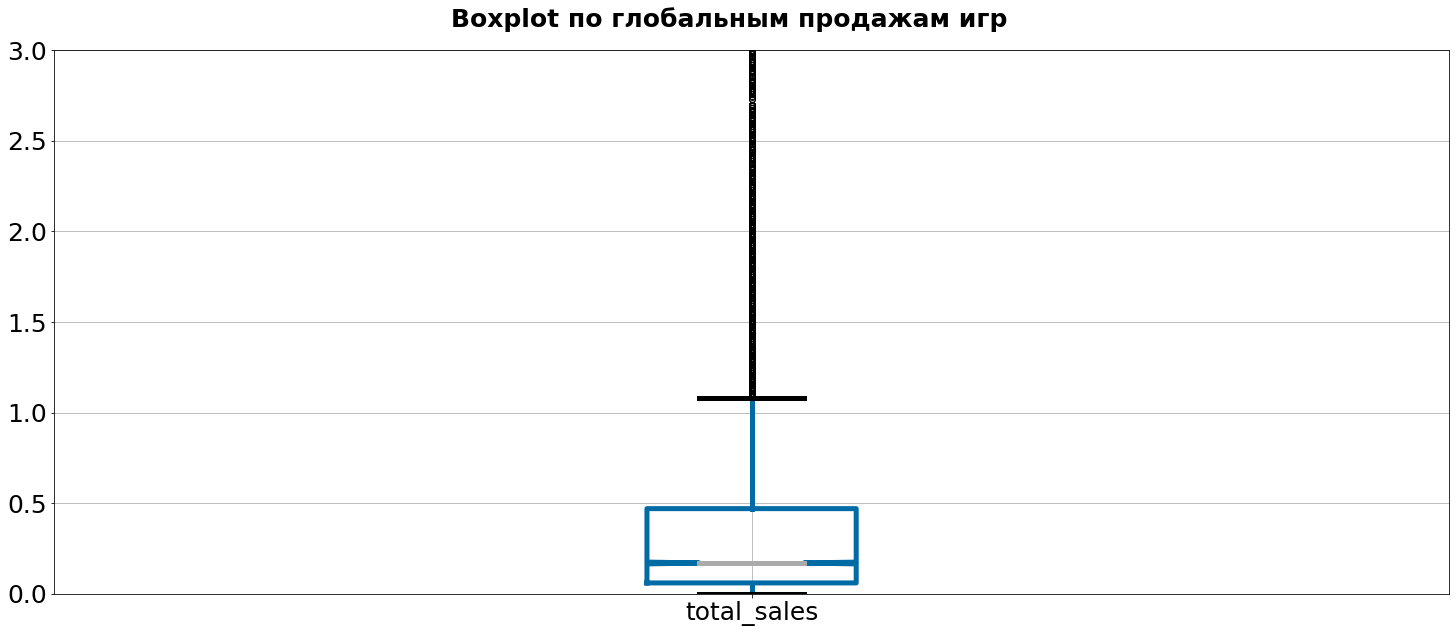

In [49]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,3])

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. Не сказать, что это много.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


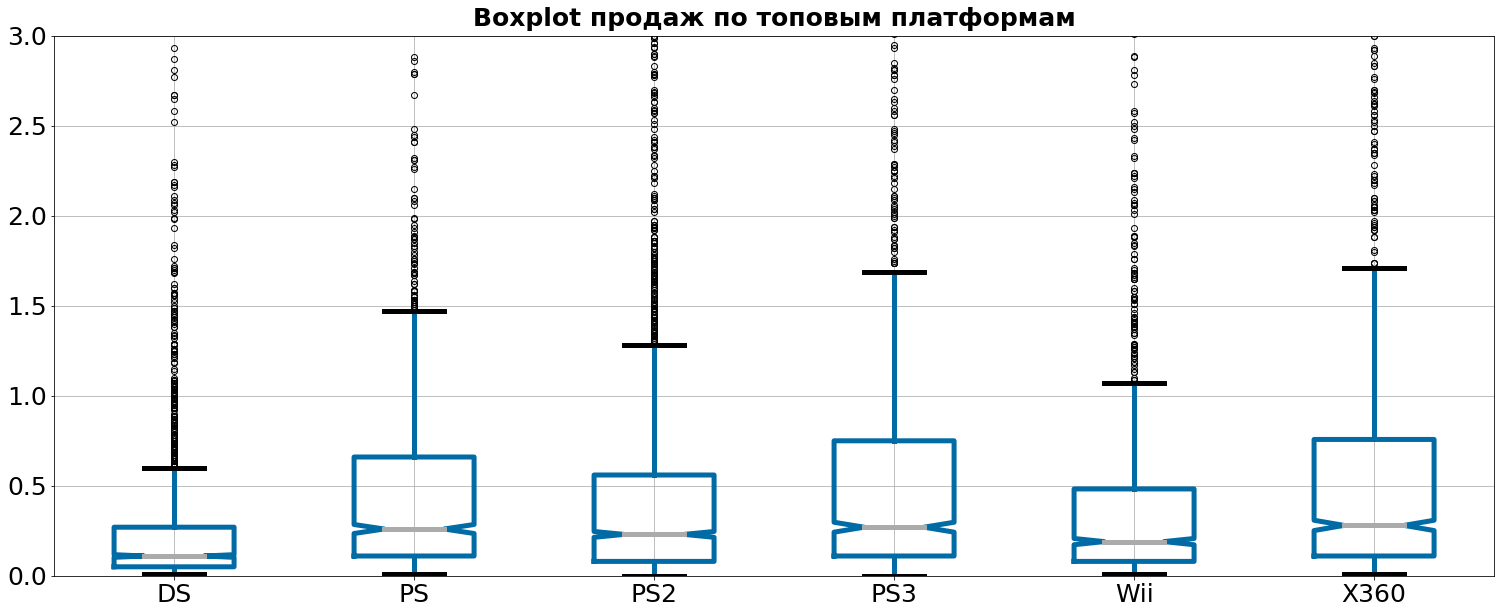

In [50]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

# Промежуточный вывод

1. Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
2.  Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов. У остальных - от 1 до 1,5 миллионов долларов. Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.

### Определим, игр какого жанра больше всего.

Распределим игры по жанрам. Нарисуем столбчатую диаграмму с количеством и общей суммой продаж.

In [51]:
most_popular_genre = games.groupby('genre').agg({'game_name':'count', 'total_sales': 'sum'}).reset_index()
most_popular_genre.sort_values(by='game_name', ascending=False).head(10).T

,0,10,3,7,8,1,6,4,9,2
genre,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting
game_name,3369,2348,1750,1498,1323,1303,1249,888,873,849
total_sales,1744.17,1331.27,802.51,934.56,1052.45,237.59,728.67,827.77,389.97,447.53


# Промежуточный вывод
Больше всего игр жанра Action. За ними следом идут игры спортивного жанра. Учитывая тот факт, что игры жанра "Sport" заметно меньше на рынке (на 1021), выручка от продаж у них практически одинаковая. Можно, сделать вывод, что спортивные игры, в среднем, стоят дороже, чем шутеры. Можно предположить, шутеры выходят преимущественно на ПК, в то время как спортивные игры - на консолях. В то время как дела с пиратством обстоят лучше, а лицензионные копии дороже. Опишем отдельно топ по количеству продаж и топ по сумме выручки.

Количество проданных копий:

1. Action.
2. Sport.
3. Игры смешанного жанра - Miscellaneous.

Сумма выручки:

1. Action.
2. Спортивный жанр.
3. Шутеры.

## Найдем игры с наибольшей и наименьшей оценкой от пользователей и критиков.

In [52]:
games[games['user_score'] > 0].sort_values(by='user_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
13682,Myth Makers: Trixie in Toyland,Wii,2008,Platform,0.04,0.00,0.0,0.00,-1.0,0.2,E,0.04
9970,Madden NFL 17,PS3,2016,Sports,0.07,0.02,0.0,0.02,-1.0,0.2,E,0.11
5764,Happy Feet,DS,2006,Action,0.27,0.01,0.0,0.02,-1.0,0.3,E,0.30
13380,Billy the Wizard: Rocket Broomstick Racing,Wii,2007,Racing,0.04,0.00,0.0,0.00,-1.0,0.3,E,0.04
10262,Charlie and the Chocolate Factory,XB,2005,Adventure,0.08,0.02,0.0,0.00,39.0,0.5,E,0.10


In [53]:
games[games['user_score'] > 0].sort_values(by='user_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
14412,Breath of Fire III,PSP,2005,Role-Playing,0.00,0.02,0.00,0.01,-1.0,9.7,T,0.03
8975,Boktai: The Sun is in Your Hand,GBA,2003,Role-Playing,0.10,0.04,0.00,0.00,83.0,9.6,E,0.14
3417,Harvest Moon: Friends of Mineral Town,GBA,2003,Simulation,0.34,0.13,0.11,0.01,81.0,9.6,E,0.59
11119,Super Puzzle Fighter II,GBA,2077,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E,0.08
10105,Cory in the House,DS,2007,Action,0.10,0.00,0.00,0.01,-1.0,9.5,E,0.11


In [54]:
games[games['critic_score'] > 0].sort_values(by='critic_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04
10662,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.0,0.01,17.0,1.7,M,0.10
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.0,0.01,19.0,1.3,M,0.06
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E,0.12
15343,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+,0.02


In [55]:
games[games['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


### Произведем оценку корреляции между оценками критиков и пользовательскими оценками.

Напишем функцию для построения матрицы корелляция.

In [56]:
import seaborn as sns

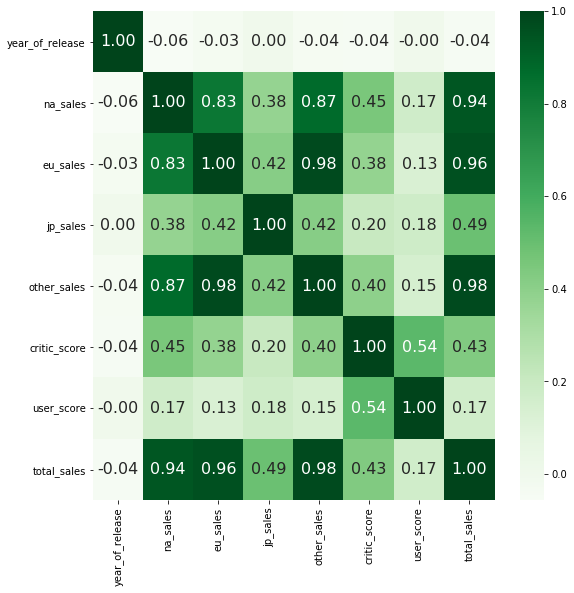

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

# Промежуточный вывод

Наиболее сильное влияение оказывает оценка критиков на конечную стоимость продукта. В то время как практически не влияет - оценка пользователей.

Напишем функцию для опеределения данных по корреляции по топовым платформам.

# Промежуточный вывод

Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму. Выделяются Wii и DS, по которым зависимость не такая большая.

Имеются платформы, где оценка критиков, согласно данных, оказывает наиболее сильное влияние на конечную выручку продукта, чем оценка пользователей. Это платформы DS, PS4 и Xone. 

В случае с DS можно предположить,что наибольшую популярность она имеет в стране производителя, соответственно, далеко не большая часть игроков принимает участие в оценке игр на данной платформу. Про PS4 и Xone - платформы довольно новые, вполне вероятно, что пользователи пока не сформировали оканчательное мнение, в связи с чем  количества отзывов, особенно качественных не имеется.

## Портрет пользователя регионов NA, EU, JP

- самые популярные платформы (топ-5), опишем различия в долях продаж;
- самые популярные жанры (топ-5), поясним разницу;
- определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Функция для прорисовки графиков top_in_regions_plot.

In [58]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
#     color_dict = {'na_sales': None, 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'} # код ревьюера
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Выделим самые популярные платформы в заданных регионах.

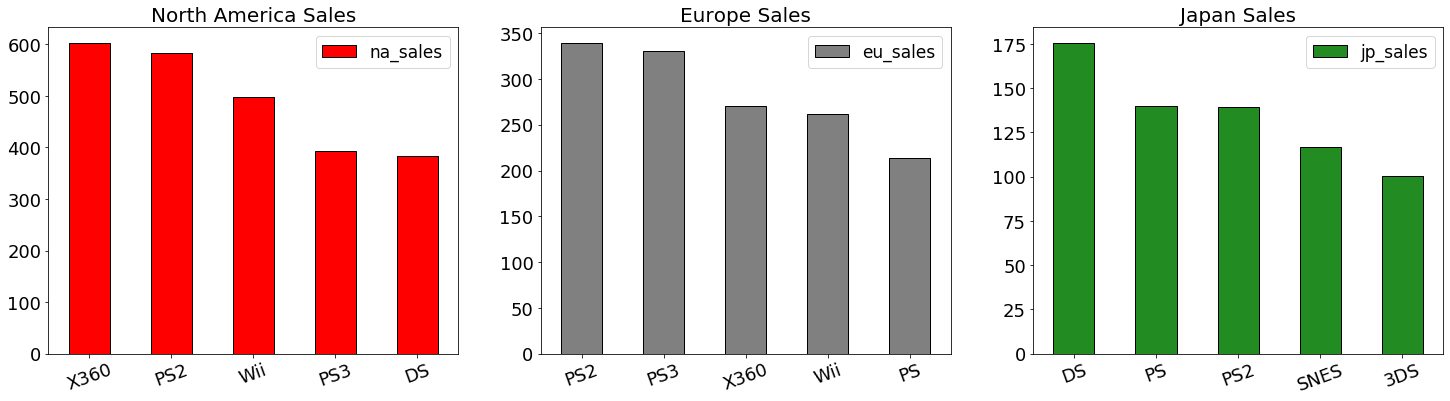

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

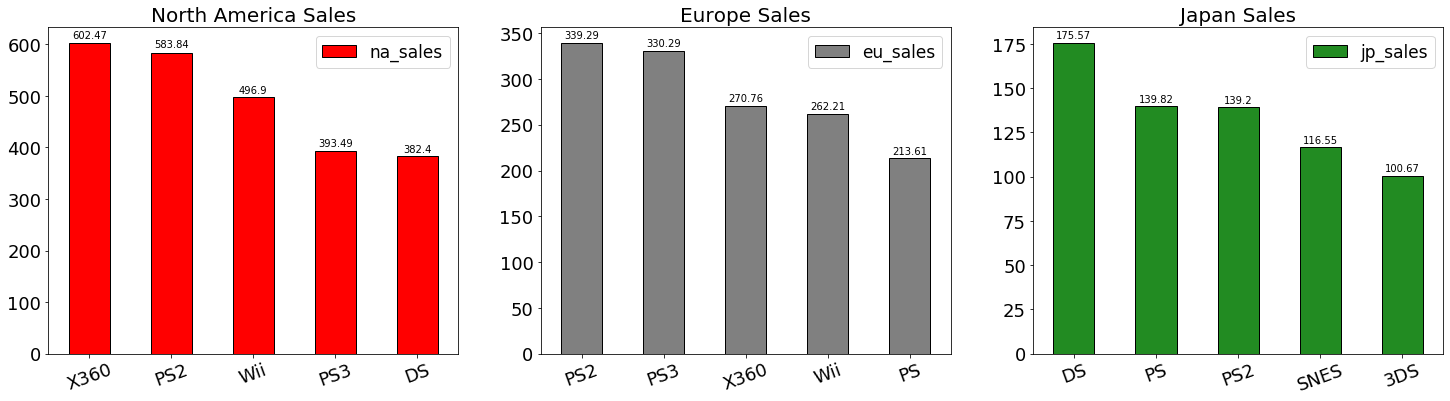

In [60]:
def top_in_regions_plot_2(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
#     color_dict = {'na_sales': None, 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'} # код ревьюера
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    
    for rect in plot.patches:
        height = rect.get_height()
        plot.text(rect.get_x() + rect.get_width()/2, 1.01*height, round(height, 2), ha='center', va='bottom')
    
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)
    
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot_2('platform', 'na_sales', 0)
top_in_regions_plot_2('platform', 'eu_sales', 1)
top_in_regions_plot_2('platform', 'jp_sales', 2)

# Промежуточный вывод

В Северной Америке имеют(имели) бешеную популярность приставки прошлого поколения X360 и PS2, отствет Wii.

В Европе одинаково (были) популярны PS2 и PS3. За ними X360, Wii и PS.

В Японии, наблюдается обратная ситуация. Лидер - DS. За ними следом американские игровые платформы PS и PS2. На последних местах японские платформы SNES и 3DS.

### Определим самые популярные жанры в заданных регионах.
Напишем функцию.

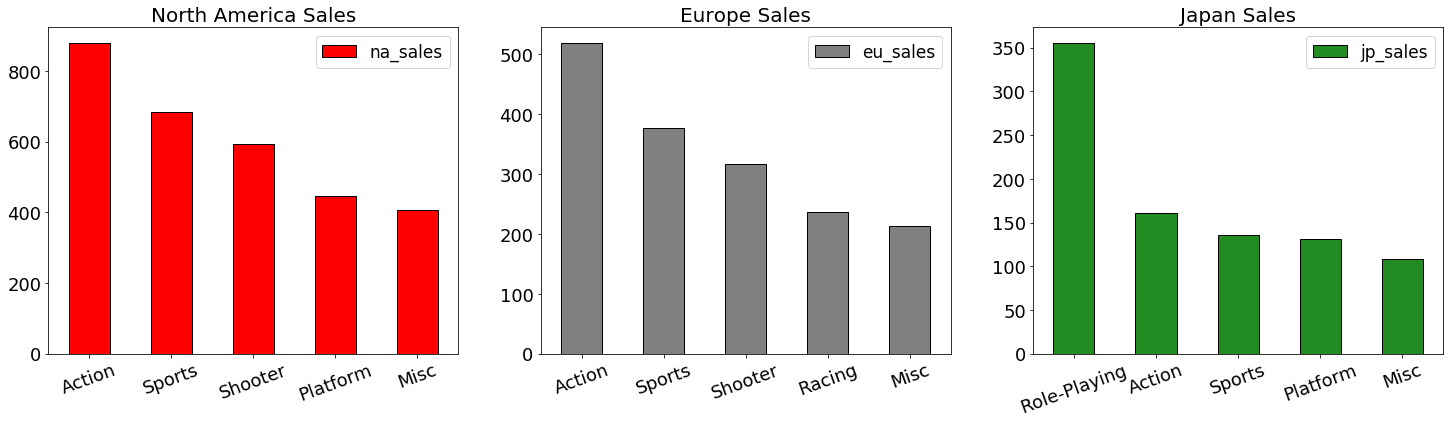

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

# Промежуточный вывод

Ситуация в Северной Америке и Европе практически одинакова, любители жанров: Action, Sport и Шутер. В Северной Америке больше играют в Platform, а в Европе Racing. В Японии иная ситуация. На первом месте c большим отрывом Role-Playing, затем следует Action и Sport.

###  Влияние рейтинга ESRB на продажи в отдельном регионе.
Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает.

In [62]:
games_2 = games.copy()

In [63]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)', 'out of rating': 'Без рейтинга'}

In [64]:
games['ESRB_description'] = games[games['rating_type'].notnull()]['rating_type'].map(ESRB_dict)

Рассмотрим продажи игр исходя из рейтинга.

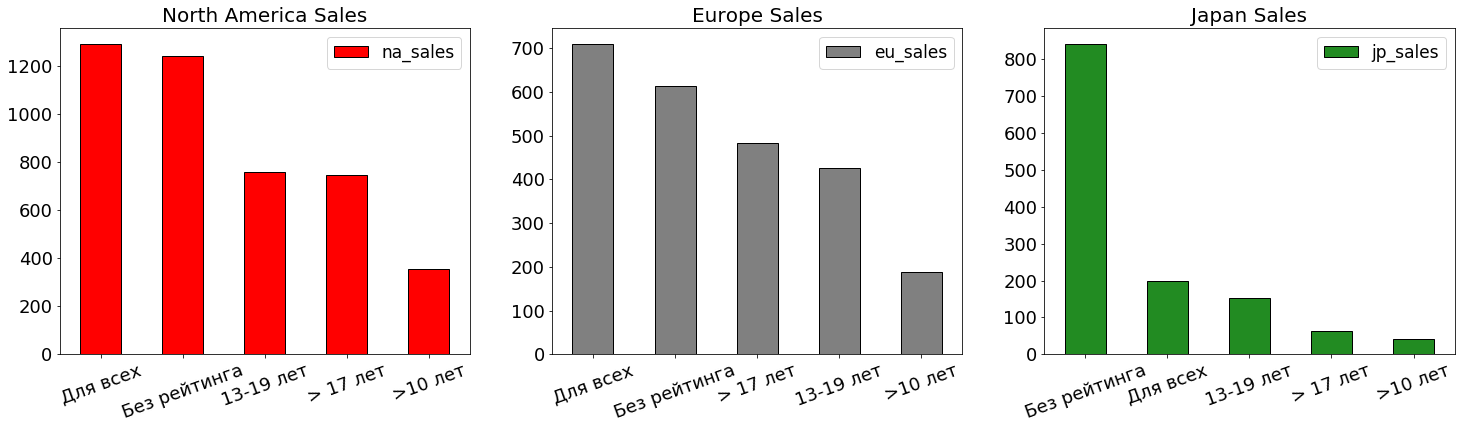

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

# Промежуточный вывод

По всем трем графикам можно сразу отметить, что категория "без рейтинга" превалирует, особенно в Японии.

В Северной Америке и Европе практически одинаковые показатели. Большая часть выручки получена по средством игр с рейтингом "Для всех". Одинаковая ситуация в Северной Америке и Европе с рейтингами: "13-19 лет" и "для лиц старше 17 лет".

В Японии обратная ситуация. На первом месте игры с рейтингом "Для всех", на втором - игры для лиц от 13 до 19 лет. Получается, что в стране начинают играть с более ранего возраста.

## Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Чтобы проверить обе гипотезы воспользуемся t-критерем Стьюдента, так как в обоих случаях выборки независимы между собой. Определим пороговое значение alpha = 0.05

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [66]:
from scipy.stats import ttest_ind

In [67]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


Можно смело отказаться от нулевой гипотезы. Можно заключить, что утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой, верно. Рассмотрим более конткретно, в чью пользу.

In [68]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 7.06


Компьютерные игры получают оценки статистически значимо выше, чем игры для Xbox One.

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [69]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.6259419280500857
p-value = 0.1041

Пороговое значение alpha = 0.05


Нельзя отвергнуть нулевую гипотезу. Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

В результате проведеной проектной работе мной были рассмотрены данные нескольких датафреймов и совершена предобработка. Данные были проверены на наличие пропущенных значений и дублированных записей. Была произведена замена пропущенных значений. Заменены некорретные типы данных. Все данные стали представлены в удобном формате. На основании всего вышесказанного мы можем констатировать следующее:

- наиболее сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков;
- средний бюджет на разработку одной игры за последние годы заметно вырос, что объясняется погоней за графикой, новыми технологиями;
- с 2010 года игровой рынок имеет спад, связанный с перенасыщением рынка, переход на мобильные платформы, интеграция социальный сетей в жизнь людей. Это привело к тому, что интерес к играм упал, а заинтересованность для инвесторов потеряла свою привлекательность;
- лидером  среди игровых платыорм является PS2, далее идут Xbox360, PS3 и Wii. Самые редкие платформы - представители японских технологий;
- больше всего игр жанра Action и Sport$
- медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру;
- данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму. Выделяются Wii и DS, по которым зависимость не такая большая.
- верна гепотиза: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой;
- верна гепотиза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
